In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import datetime

#from jupyterthemes import jtplot
#jtplot.style()
#jtplot.reset()

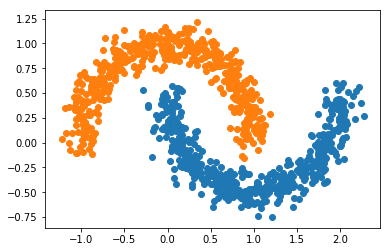

In [2]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)
plt.scatter(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1])
plt.scatter(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1])
# add bias
X_moons = np.hstack((np.ones((X_moons.shape[0], 1)), X_moons))
X_train, X_test, y_train, y_test = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42)

In [3]:
def get_rand_batch(X, y, b_size):
    idx = np.random.randint(0, X.shape[0]-b_size)
    return X[idx:idx+size], y[idx:idx+size]

In [4]:
feature_columns = []
feature_columns.append(tf.feature_column.numeric_column('b'))
feature_columns.append(tf.feature_column.numeric_column('x'))
feature_columns.append(tf.feature_column.numeric_column('y'))


def make_input_fn(X, y, num_epochs=10, batch_size=100):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices(
            (dict(zip(['b', 'x', 'y'], X.T)), y))
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function


train_input_fn = make_input_fn(X_train, y_train)
eval_input_fn = make_input_fn(X_test, y_test, num_epochs=1)

x_column = feature_columns[1]
tf.keras.layers.DenseFeatures([x_column])(s).numpy().shape

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
linear_est.train(train_input_fn)

NameError: name 's' is not defined

In [ ]:
result = linear_est.evaluate(eval_input_fn)
print(result)

len(list(linear_est.predict(eval_input_fn)))
list(linear_est.predict(eval_input_fn))[0:2]